In [1]:
import circuitq as cq

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Initialize fluxonium circuit
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(0,1, element = 'L')

circuit = cq.CircuitQ(graph)
cq.visualize_circuit_general(graph, 'Fluxonium circuit')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [10]:
circuit.h

-E_{J010}*cos(\Phi_{1}/\Phi_{o}) + (\Phi_{1} + \tilde{\Phi}_{010})**2/(2*L_{010}) + 0.5*q_{1}**2/C_{01}

In [11]:
circuit.h_parameters

[C_{01}, E_{J010}, L_{010}, \tilde{\Phi}_{010}]

In [17]:
h = 6.62606957e-34
EC = 1e9*h
EJ = 1e9*h
EL = 7e9*h
phi_ext = np.pi*circuit.phi_0

In [24]:
h_num = circuit.get_numerical_hamiltonian(401,
                    parameter_values=[False, EJ, False, phi_ext ])

                    

In [25]:
eigv, eigs = circuit.get_eigensystem()

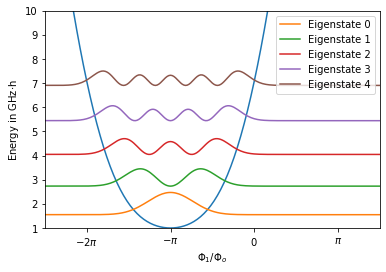

In [26]:
y_scaling = 1/(h *1e9)
plt.plot(circuit.flux_list, np.array(circuit.potential)*y_scaling, lw=1.5)
for n in range(5):
    plt.plot(circuit.flux_list,
             (eigv[n]+ abs(eigs[:,n])**2*2e-23)*y_scaling
             ,label="Eigenstate " +str(n))
plt.legend()
plt.xlabel(r"$\Phi_1 / \Phi_o$")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.xticks(np.linspace(-2*np.pi, 1*np.pi, 4)*circuit.phi_0 ,
           [r'$-2\pi$', r'$-\pi$',r'$0$',r'$\pi$'])
plt.xlim(-2.5*np.pi*circuit.phi_0, 1.5*np.pi*circuit.phi_0)
plt.ylim(1,10)
plt.show()